## Environmental Sensor Telemetry Data

### Problem Definition

Build a machine learning model using environmental sensor telemetry data to learn to predict any motion. For example, these motion sensors can register a human, a bird, or an animal motion. When the sensors detect motion, they transmit the data to the IoT devices for logging. With the logged data, any movement will then be predicted by a machine-learning algorithm, forecasting the score as binary, true or false.

### Why is the Problem Worth Solving?

It's critical to know how the sensors are doing, especially if they're positioned in hard-to-reach places. With the help of a machine learning algorithm, it is now possible to swiftly determine the state of these sensors without having to inspect them physically. This technology will be helpful in a variety of industries, particularly for those who are monitoring the status of species that are considered to be extinct....

### Details

A series of three identical, custom-built, breadboard-based sensor arrays collected the data via a Raspberry Pi device connected to each array. Each of the three IoT devices was placed in a different physical location with different ambient conditions.


```text
| device            | environmental conditions                 |
|-------------------|------------------------------------------|
| 00:0f:00:70:91:0a | stable conditions, cooler and more humid |
| 1c:bf:ce:15:ec:4d | highly variable temperature and humidity |
| b8:27:eb:bf:9d:51 | stable conditions, warmer and dryer      |
```

Regularly, each IoT device collects a total of seven different readings from the four sensors. Temperature, humidity, carbon monoxide (CO), liquefied petroleum gas (LPG), smoke, light, and motion are all measured by sensors. The data spans the period from 07/12/2020 00:00:00 UTC–07/19/2020 23:59:59 UTC. There are 405,184 rows of data in total.

### Columns

There are nine columns in the dataset, as follows.

```text
| column   | description          | units      |
|----------|----------------------|------------|
| ts       | timestamp of event   | epoch      |
| device   | unique device name   | string     |
| co       | carbon monoxide      | ppm (%)    |
| humidity | humidity             | percentage |
| light    | light detected?      | boolean    |
| lpg      | liquid petroleum gas | ppm (%)    |
| motion   | motion detected?     | boolean    |
| smoke    | smoke                | ppm (%)    |
| temp     | temperature          | Fahrenheit |
```

## Methodology

### 1. Import Libraries

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

### 2. Load Dataset

In [2]:
def parse(x):
    return pd.to_datetime(x, infer_datetime_format=True, unit='s',utc=True)

In [3]:
nrows_read = 100000 # specify 'None' if want to read whole file (405,184 rows)
data_path="iot_telemetry_data.csv"

df = pd.read_csv(data_path,
                  delimiter=',',
                  nrows = nrows_read,
                  header=0,
                  infer_datetime_format=True,
                  date_parser=parse,
                  index_col=['ts'])

In [5]:
df

,device,co,humidity,light,lpg,motion,smoke,temp
ts,,,,,,,,
2020-07-12 00:01:34.385974646+00:00,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
2020-07-12 00:01:34.735567570+00:00,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2020-07-12 00:01:38.073572874+00:00,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
2020-07-12 00:01:39.589145899+00:00,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
2020-07-12 00:01:41.761234999+00:00,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000
...,...,...,...,...,...,...,...,...
2020-07-13 23:43:39.841733694+00:00,1c:bf:ce:15:ec:4d,0.004089,58.099998,True,0.006657,False,0.017592,26.000000
2020-07-13 23:43:40.898137569+00:00,b8:27:eb:bf:9d:51,0.005236,47.700000,False,0.007961,False,0.021297,22.200000
2020-07-13 23:43:41.037756920+00:00,00:0f:00:70:91:0a,0.004167,73.800003,False,0.006749,False,0.017851,19.000000


### 3. Data Wrangling

In [6]:
#Get the shape of the dataset.
df.shape

(100000, 8)

In [7]:
#Let's look at some more details regarding the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100000 entries, 2020-07-12 00:01:34.385974646+00:00 to 2020-07-13 23:43:45.399207115+00:00
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   device    100000 non-null  object 
 1   co        100000 non-null  float64
 2   humidity  100000 non-null  float64
 3   light     100000 non-null  bool   
 4   lpg       100000 non-null  float64
 5   motion    100000 non-null  bool   
 6   smoke     100000 non-null  float64
 7   temp      100000 non-null  float64
dtypes: bool(2), float64(5), object(1)
memory usage: 5.5+ MB


In [8]:
#Check for missing values.
df.isnull().sum()

device      0
co          0
humidity    0
light       0
lpg         0
motion      0
smoke       0
temp        0
dtype: int64

In [9]:
# sort data
df = df.sort_values(by='ts', ascending=True)

In [10]:
#Get basic statistics.
df.describe()

,co,humidity,lpg,smoke,temp
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.004680,60.909301,0.007302,0.019438,22.125995
std,0.001137,11.017397,0.001229,0.003519,2.469348
min,0.002264,6.900000,0.004341,0.011142,0.100000
25%,0.004132,51.200000,0.006708,0.017736,19.700001
50%,0.004833,55.200000,0.007513,0.020020,21.900000
75%,0.005114,74.300003,0.007826,0.020912,23.600000
max,0.014420,79.300003,0.016567,0.046590,28.600000


### 4. Data Preprocessing

It's necessary to encode the columns "device," "light," and "motion."

In [11]:
#Using label encoding, convert category columns to binary.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder=LabelEncoder()
Devices = labelencoder.fit_transform(df['device'])
Light = labelencoder.fit_transform(df['light'])
Motion = labelencoder.fit_transform(df['motion'])

onehotencoder=OneHotEncoder()

In [12]:
#Get the encoded labels
df['device'] = Devices
df['light'] = Light
df['motion'] = Motion
df

,device,co,humidity,light,lpg,motion,smoke,temp
ts,,,,,,,,
2020-07-12 00:01:34.385974646+00:00,2,0.004956,51.000000,0,0.007651,0,0.020411,22.700000
2020-07-12 00:01:34.735567570+00:00,0,0.002840,76.000000,0,0.005114,0,0.013275,19.700001
2020-07-12 00:01:38.073572874+00:00,2,0.004976,50.900000,0,0.007673,0,0.020475,22.600000
2020-07-12 00:01:39.589145899+00:00,1,0.004403,76.800003,1,0.007023,0,0.018628,27.000000
2020-07-12 00:01:41.761234999+00:00,2,0.004967,50.900000,0,0.007664,0,0.020448,22.600000
...,...,...,...,...,...,...,...,...
2020-07-13 23:43:39.841733694+00:00,1,0.004089,58.099998,1,0.006657,0,0.017592,26.000000
2020-07-13 23:43:40.898137569+00:00,2,0.005236,47.700000,0,0.007961,0,0.021297,22.200000
2020-07-13 23:43:41.037756920+00:00,0,0.004167,73.800003,0,0.006749,0,0.017851,19.000000


In [13]:
#Recheck for missing data.
df.isnull().sum()

device      0
co          0
humidity    0
light       0
lpg         0
motion      0
smoke       0
temp        0
dtype: int64

In [14]:
# convert celsius to fahrenheit (°C to °F)
df['temp'] = (df['temp'] * 1.8) + 32

In [15]:
# preview data
df.head(5)

,device,co,humidity,light,lpg,motion,smoke,temp
ts,,,,,,,,
2020-07-12 00:01:34.385974646+00:00,2,0.004956,51.000000,0,0.007651,0,0.020411,72.860000
2020-07-12 00:01:34.735567570+00:00,0,0.002840,76.000000,0,0.005114,0,0.013275,67.460001
2020-07-12 00:01:38.073572874+00:00,2,0.004976,50.900000,0,0.007673,0,0.020475,72.680000
2020-07-12 00:01:39.589145899+00:00,1,0.004403,76.800003,1,0.007023,0,0.018628,80.600000
2020-07-12 00:01:41.761234999+00:00,2,0.004967,50.900000,0,0.007664,0,0.020448,72.680000


### 5. Data Visualization

In [16]:
# filter temp/humidity, by device, for outliers (>1% & <99%)
df = df.loc[df['temp'] >df.groupby('device').temp.transform(lambda x: x.quantile(.01))]
df = df.loc[df['temp'] < df.groupby('device').temp.transform(lambda x: x.quantile(.99))]

df = df.loc[df['humidity'] > df.groupby('device').humidity.transform(lambda x: x.quantile(.01))]
df = df.loc[df['humidity'] < df.groupby('device').humidity.transform(lambda x: x.quantile(.99))]

In [17]:
# group data by iot device
groups = df.groupby('device')

In [18]:
print('DataFrame Stats')
print('-------------')
print('Record count: {:,}'.format(df['temp'].count()))
print('DataFrame size (MB): {:,.2f}'.format(sys.getsizeof(df)/1024/1024))
print('-------------')
print('Time range (min): {:%Y-%m-%d %H:%M:%S %Z}'.format(df.index[1]))
print('Time range (max): {:%Y-%m-%d %H:%M:%S %Z}'.format(df.index[-1]))
print('Temperature (min): {:.2f}'.format(df['temp'].min()))
print('Temperature (max): {:.2f}'.format(df['temp'].max()))
print('Humidity (min): {:.2f}{}'.format(df['humidity'].min(), '%'))
print('Humidity (max): {:.2f}{}'.format(df['humidity'].max(), '%'))
print('-------------')
print('Record count:\n{}'.format(groups.size()))

DataFrame Stats
-------------
Record count: 93,800
DataFrame size (MB): 6.08
-------------
Time range (min): 2020-07-12 00:01:34 UTC
Time range (max): 2020-07-13 23:43:45 UTC
Temperature (min): 65.66
Temperature (max): 83.12
Humidity (min): 47.90%
Humidity (max): 77.80%
-------------
Record count:
device
0    25221
1    24633
2    43946
dtype: int64


### Pie chart using Matplotlib

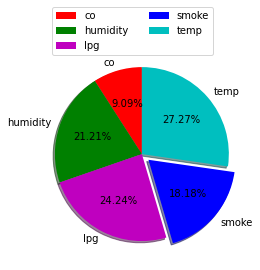

In [19]:
affect=['co', 'humidity', 'lpg', 'smoke', 'temp']
slice=[3,7,8,6,9]
color=['r', 'g', 'm', 'b', 'c']

plt.pie(slice, labels=affect, colors=color, startangle=90,shadow=True, 
       explode=(0,0,0,0.1,0), autopct='%1.2f%%')
plt.legend(bbox_to_anchor =(0.85, 1.20), ncol = 2) 
plt.show()

C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='device', ylabel='count'>

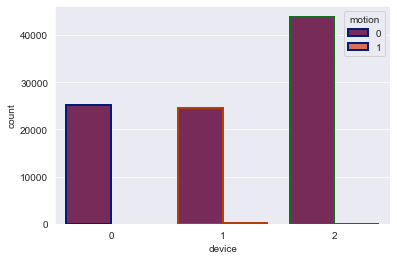

In [20]:
sns.set_style('darkgrid')
sns.countplot('device', hue='motion',palette="rocket", edgecolor=sns.color_palette("dark", 3),linewidth=2, data=df)

### Scatter Plot using Matplotlib

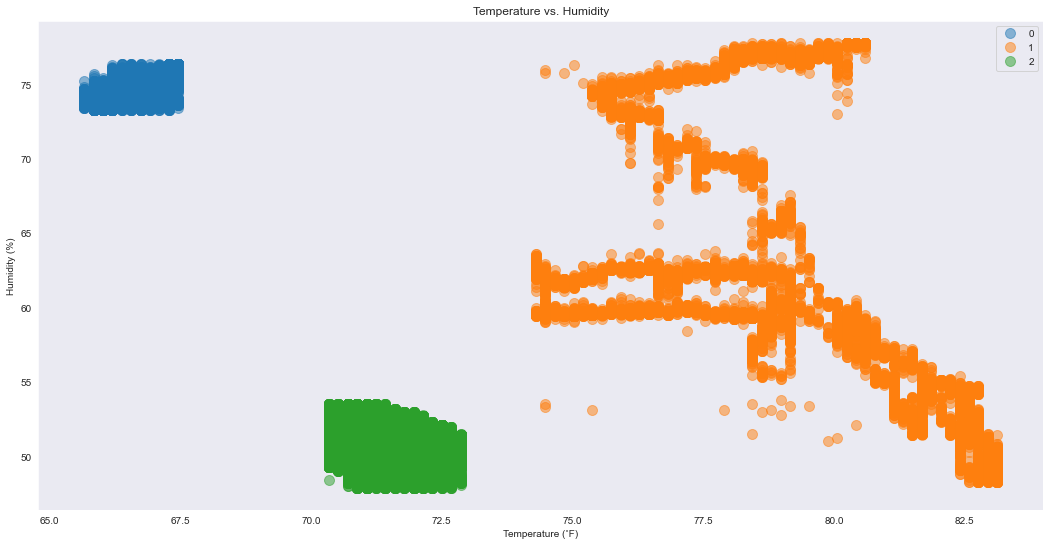

In [21]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))
for device, group in groups:
    ax.plot(group.temp,
            group.humidity,
            marker='o',
            linestyle='',
            alpha=.5,
            ms=10,
            label=device)
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Temperature vs. Humidity')
plt.xlabel('Temperature (˚F)')
plt.ylabel('Humidity (%)')
plt.show()

### Temperature Graph (Moving Average)

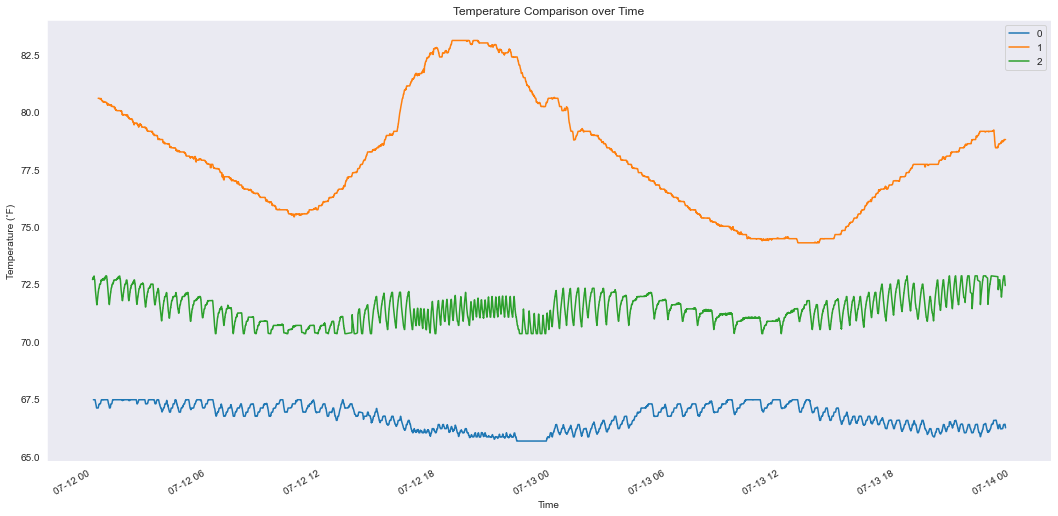

In [22]:
#Smoothing data using the mean average of a 1 minute rolling window
#1 minutes == (20) data-points @ 3 second intervals
fig, ax = plt.subplots(1, 1, figsize=(18, 9))
for device, group in groups:
    group.mean = group.temp.rolling(window=20).mean()
    ax.plot(group.mean,
            label=device)
fig.autofmt_xdate()
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Temperature Comparison over Time')
plt.ylabel('Temperature (˚F)')
plt.xlabel('Time')
plt.show()

### Humidity Graph (Moving Average)

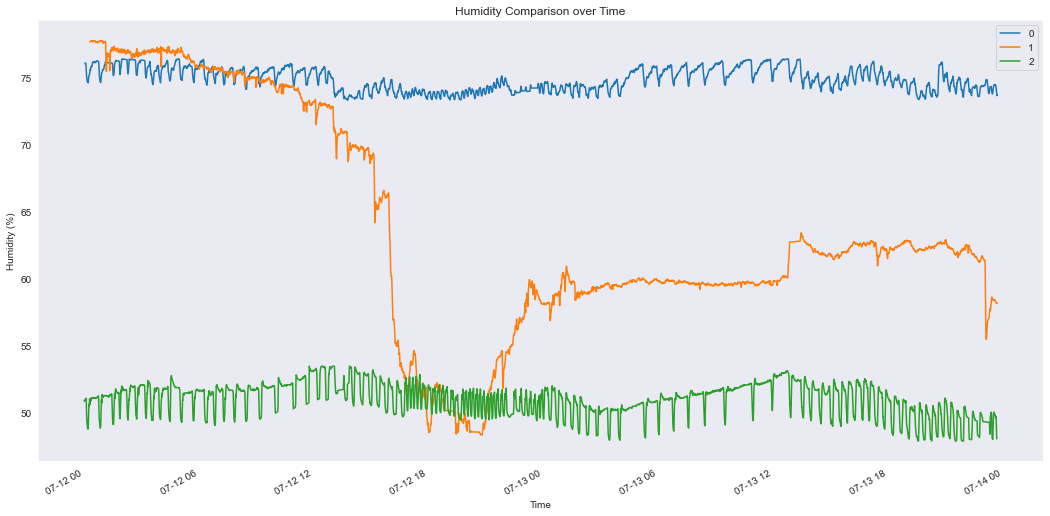

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(18, 9))
for device, group in groups:
    group.mean = group.humidity.rolling(window=20).mean()
    ax.plot(group.mean,
            label=device)
fig.autofmt_xdate()
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Humidity Comparison over Time')
plt.ylabel('Humidity (%)')
plt.xlabel('Time')
plt.show()

### 6. Exploratory Data Analysis

#### Univariate Analysis

Let's obtain a clear idea of which features will be critical to our model's performance.

C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


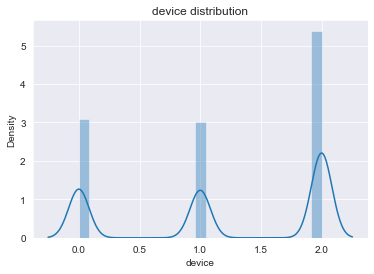

C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


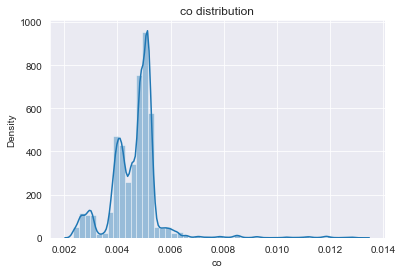

C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


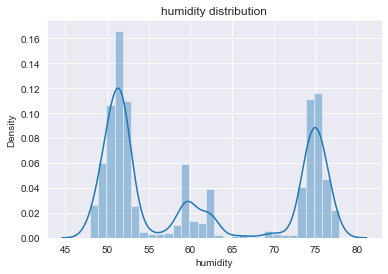

C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


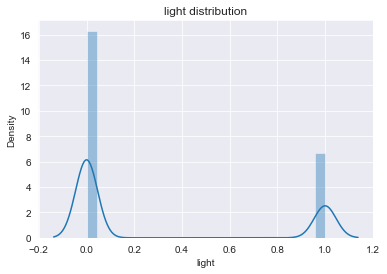

C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


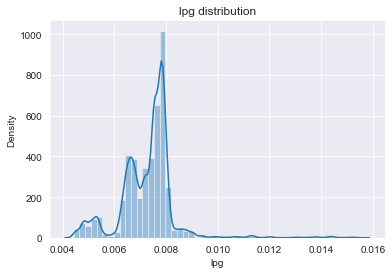

C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


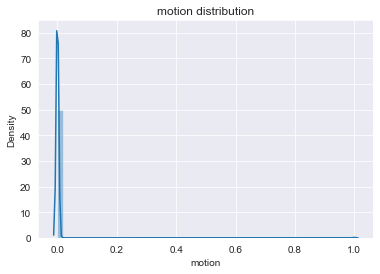

C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


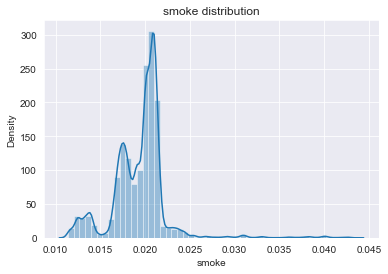

C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


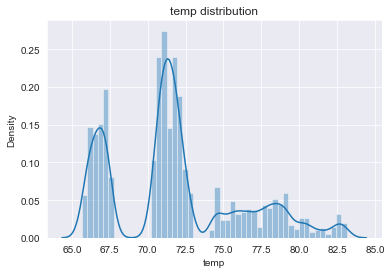

In [24]:
for x in df:
    sns.distplot(df[x]);
    plt.title("{} distribution".format(x))
    plt.show()

Let's look at the categorical or binary variables now that we've seen the continuous variables in the figure above.

C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


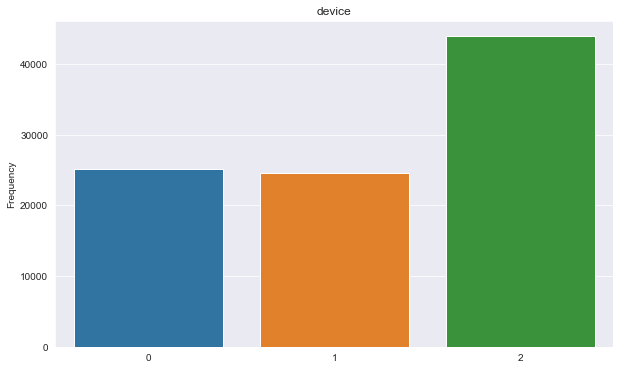

C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


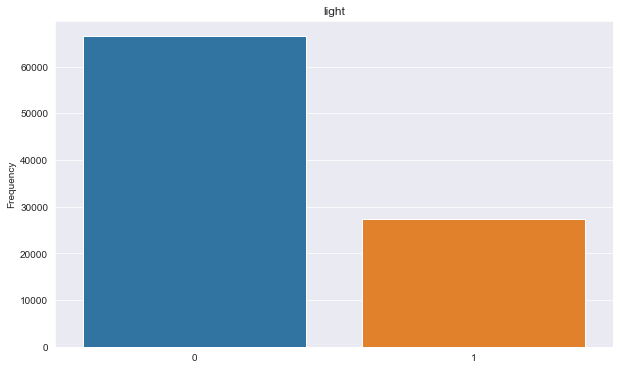

C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


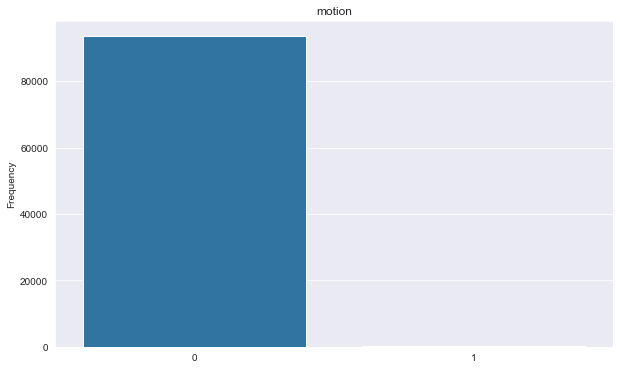

In [25]:
def barplot(column_name):
    val = df[column_name]
    valCount = val.value_counts()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(valCount.index, valCount)
    plt.title(column_name)
    plt.ylabel('Frequency')
    plt.show()

for i in df.columns:
    if df[i].nunique() <= 5:
        barplot(i)

### Multivariate Data Analysis

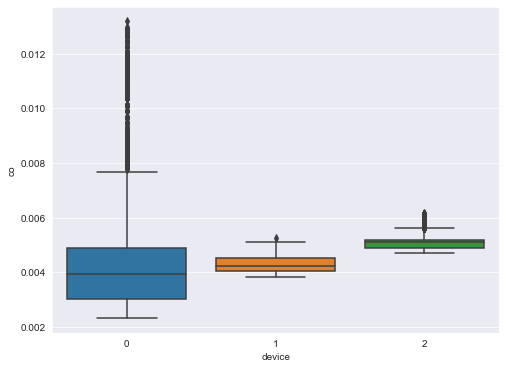

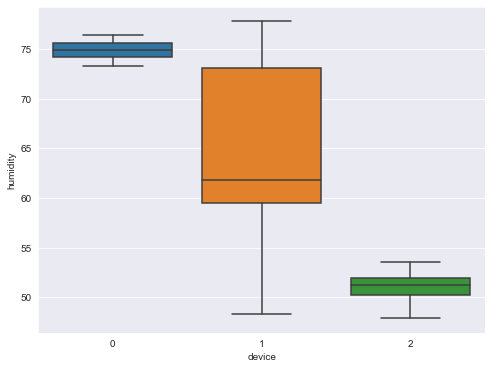

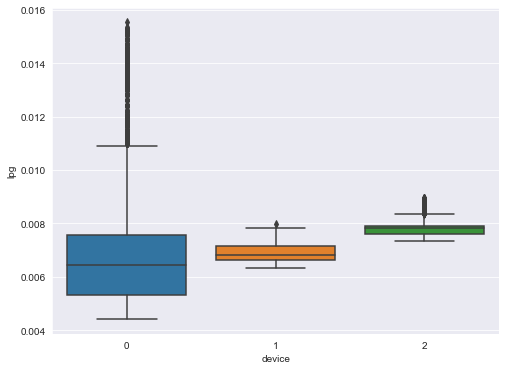

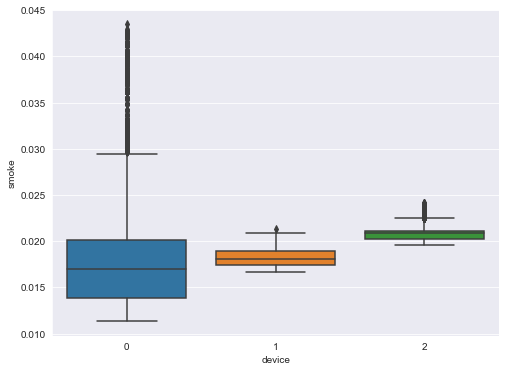

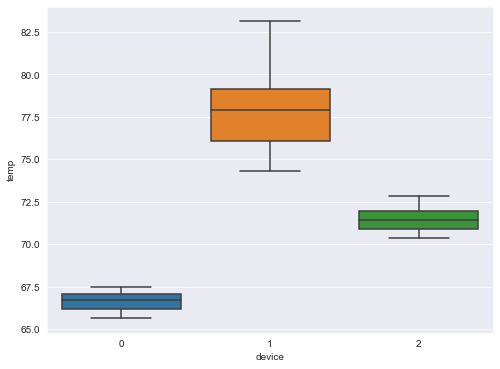

In [26]:
for k in df.columns:
    if df[k].nunique() > 5:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df['device'], y=df[k])
        plt.show()
        

Correlation Summary: 


humidity   -0.021177
co         -0.003648
smoke      -0.002971
lpg        -0.002816
device      0.008723
light       0.032476
temp        0.047774
Name: motion, dtype: float64

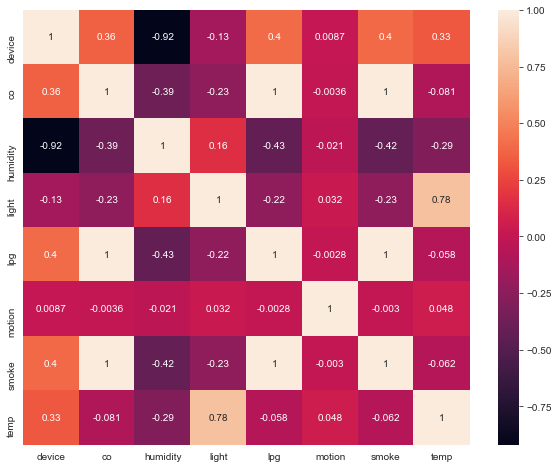

In [27]:
#Data Correlation.
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), annot=True);

#Summarize the heatmap
print("Correlation Summary: ")
df.corr()['motion'].sort_values()[:-1]

* It appears that motion and humidity have a negative correlation. Therefore, we can build a model by removing the humidity column. Then try making a new model that includes the humidity column. There doesn't appear to be a column with a very high correlation coefficient. Thus columns with a positive correlation coefficient don't need to be removed.

* Remove outliers from the dataset's numerical data. Then, using Scikit-learns Standard Scaler, standardize the values of cleaned data.

In [28]:
#Remove column.
# iot_data = df.copy()
# drop_column = ['humidity']

# new_columns = iot_data.drop(drop_column, axis=1)
# iot_data.head()

df.shape

(93800, 8)

In [29]:
#Remove outliers.
# Q1 = df.quantile(.25)
# Q3 = df.quantile(.75)
# IQR = Q3-Q1
# new_data = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
# new_data.head()

#I commented this out because I noticed that my target column (motion) now has only one class "0" because the false
#values are more than the true values. To correct this anormally, I need to randomly delete percentage row or
#randomly oversample for multiclass. That way the variables will be balanced. But as it is now, it is overbalanced.

In [30]:
#Show the new dataframe with outliers removed.
# plt.figure(figsize=(20,10))
# plt.title('Boxplot of Dataset')
# sns.boxplot(data=new_data);

In [31]:
# new_data.shape

In [34]:
#Scale humidity.
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scale_humidity_col =pd.DataFrame(scaler.fit_transform(new_data[['humidity']]), columns=['humidity_scaled'])
# scale_humidity_col.index = new_data.index
# scaled_col_1 = pd.concat([new_data, scale_humidity_col], axis=1)
# scaled_col_1.head()

# Added the code below because of the changes made which has affected new_data.
scaler = StandardScaler()
scale_humidity_col =pd.DataFrame(scaler.fit_transform(df[['humidity']]), columns=['humidity_scaled'])
scale_humidity_col.index = df.index
scaled_col_1 = pd.concat([df, scale_humidity_col], axis=1)
scaled_col_1.head()

,device,co,humidity,light,lpg,motion,smoke,temp,humidity_scaled
ts,,,,,,,,,
2020-07-12 00:01:34.385974646+00:00,2,0.004956,51.000000,0,0.007651,0,0.020411,72.860000,-0.906078
2020-07-12 00:01:34.735567570+00:00,0,0.002840,76.000000,0,0.005114,0,0.013275,67.460001,1.389247
2020-07-12 00:01:38.073572874+00:00,2,0.004976,50.900000,0,0.007673,0,0.020475,72.680000,-0.915259
2020-07-12 00:01:39.589145899+00:00,1,0.004403,76.800003,1,0.007023,0,0.018628,80.600000,1.462698
2020-07-12 00:01:41.761234999+00:00,2,0.004967,50.900000,0,0.007664,0,0.020448,72.680000,-0.915259


In [35]:
#Scale temp. column.
# scaler = StandardScaler()
# scale_temp_col =pd.DataFrame(scaler.fit_transform(new_data[['temp']]), columns=['temp_scaled'])
# scale_temp_col.index = new_data.index
# scaled_col_2 = pd.concat([new_data, scale_temp_col], axis=1)
# scaled_col_2.head()

#Added these lines of code for the same reason above.
scaler = StandardScaler()
scale_temp_col =pd.DataFrame(scaler.fit_transform(df[['temp']]), columns=['temp_scaled'])
scale_temp_col.index = df.index
scaled_col_2 = pd.concat([df, scale_temp_col], axis=1)
scaled_col_2.head()

,device,co,humidity,light,lpg,motion,smoke,temp,temp_scaled
ts,,,,,,,,,
2020-07-12 00:01:34.385974646+00:00,2,0.004956,51.000000,0,0.007651,0,0.020411,72.860000,0.227527
2020-07-12 00:01:34.735567570+00:00,0,0.002840,76.000000,0,0.005114,0,0.013275,67.460001,-1.021876
2020-07-12 00:01:38.073572874+00:00,2,0.004976,50.900000,0,0.007673,0,0.020475,72.680000,0.185880
2020-07-12 00:01:39.589145899+00:00,1,0.004403,76.800003,1,0.007023,0,0.018628,80.600000,2.018339
2020-07-12 00:01:41.761234999+00:00,2,0.004967,50.900000,0,0.007664,0,0.020448,72.680000,0.185880


### 7. Split Dataset into Training, Testing, and Validation Sets

In [36]:
#Drop the target variable from the dataset.
# X = new_data.drop('motion', axis= 1)
# y = new_data['motion'].values
# y

X = df.drop('motion', axis= 1)
y = df['motion'].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
X

,device,co,humidity,light,lpg,smoke,temp
ts,,,,,,,
2020-07-12 00:01:34.385974646+00:00,2,0.004956,51.000000,0,0.007651,0.020411,72.860000
2020-07-12 00:01:34.735567570+00:00,0,0.002840,76.000000,0,0.005114,0.013275,67.460001
2020-07-12 00:01:38.073572874+00:00,2,0.004976,50.900000,0,0.007673,0.020475,72.680000
2020-07-12 00:01:39.589145899+00:00,1,0.004403,76.800003,1,0.007023,0.018628,80.600000
2020-07-12 00:01:41.761234999+00:00,2,0.004967,50.900000,0,0.007664,0.020448,72.680000
...,...,...,...,...,...,...,...
2020-07-13 23:43:31.796826363+00:00,0,0.004325,73.699997,0,0.006934,0.018374,66.200000
2020-07-13 23:43:35.613341808+00:00,0,0.004167,73.699997,0,0.006749,0.017851,66.200000
2020-07-13 23:43:39.841733694+00:00,1,0.004089,58.099998,1,0.006657,0.017592,78.800000


* I'll split the whole dataset into two parts: a train and a test dataset with a training percentage of 80% and a test percentage of 20%. 
* Next, I'll split the training dataset into two parts: training data (80%) and validation data (20%).

In [38]:
#First splitting of the dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
#Second split or validation set.
xTrain, xVal, yTrain, yVal = train_test_split(X_train, y_train,test_size=0.2, random_state=0)

### 8. Build Machine Learning Model

#### i. Logistics Regression Classifier

In [40]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [44]:
prediction = reg.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(0.5, 16.0, 'Predicted label')

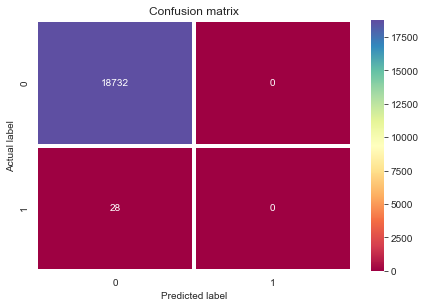

In [45]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cnf_matrix = metrics.confusion_matrix(y_test, prediction)
#cnf_matrix
sns.heatmap(cnf_matrix, annot=True, cmap="Spectral" ,fmt='g', linewidth = 3)
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [46]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

Accuracy: 0.9985074626865672
Precision: 0.0
Recall: 0.0


C:\Users\Ikenna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


I'll create a baseline model with RandomForest Classifier to determine which model is best for classifying the dataset and has the best hyperparameter. Next, the baseline model will be trained with the training dataset and validated using the validation data. Finally, I will evaluate the model using the confusion matrix, precision, and recall.

#### ii. RandomForest Classifier

In [42]:
#Import RandomForest Classifier.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier(random_state=0, max_depth=1)
model.fit(xTrain, yTrain)
predResult = model.predict(xVal)
report = classification_report(yVal, predResult)
confMat = confusion_matrix(yVal, predResult)
print(report)
print(confMat)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14981
           1       0.00      0.00      0.00        27

    accuracy                           1.00     15008
   macro avg       0.50      0.50      0.50     15008
weighted avg       1.00      1.00      1.00     15008

[[14981     0]
 [   27     0]]


C:\Users\Ikenna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ikenna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ikenna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
#Validation set
model = RandomForestClassifier(random_state=0, max_depth=1)
model.fit(X_train, y_train)
prediction = model.predict(X_train)
reports = classification_report(y_train, prediction)
conf = confusion_matrix(y_train, prediction)
print(reports)
print(conf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     74905
           1       0.00      0.00      0.00       135

    accuracy                           1.00     75040
   macro avg       0.50      0.50      0.50     75040
weighted avg       1.00      1.00      1.00     75040

[[74905     0]
 [  135     0]]


C:\Users\Ikenna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ikenna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ikenna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Data Modeling Results:

* Since there are only 482 True values in the Motion column (which is 0% of the entire dataset), the machine will not predict the target column correctly unless I find a way to balance this dataset. 
* I can either delete the excess data (which doesn't seem right) or randomly resample the data to generate more data to even out the dataset.
* The accuracy is nearly 100 percent, indicating that the machine is overfitted. Precision = 0, indicating that the machine could not locate relevant data with accurate values. Recall = 0 indicates that the search could not obtain all relevant data.
* Another option for increasing the classifier's performance is to delete features with a very high correlation coefficient. Then the model can be built using predictor variables that correlate to the target column.

### 9. Conclusion

This project demonstrates the process of building a machine learning model to predict motion using environmental sensor telemetry data. The analysis revealed significant class imbalance in the target variable, which poses a challenge for accurate predictions. To address this, techniques such as oversampling, undersampling, or synthetic data generation (e.g., SMOTE) should be explored to balance the dataset.

The exploratory data analysis provided valuable insights into the relationships between features, highlighting the importance of temperature and humidity in predicting motion. However, the high correlation among some features suggests that feature selection or dimensionality reduction techniques (e.g., PCA) could further improve model performance.

The Logistic Regression and Random Forest models were evaluated, but their performance was hindered by the imbalanced dataset. While the Random Forest model showed promise, its accuracy and precision metrics indicate overfitting, likely due to the imbalance in the data.

Future work should focus on balancing the dataset, optimizing hyperparameters, and experimenting with advanced algorithms such as Gradient Boosting or Neural Networks. Additionally, deploying the model in a real-world scenario would require continuous monitoring and retraining to adapt to changing environmental conditions.

In conclusion, this project provides a solid foundation for motion prediction using IoT sensor data. With further refinement and data balancing, the models developed here can be effectively utilized in applications such as wildlife monitoring, security systems, and environmental research.